In [1]:
import sys
sys.path.append('/home/jovyan/workspace')

In [2]:
import numpy as np
from underworld import function as fn

from modelscripts import arrhenius
from planetengine import quickShow
import planetengine
from planetengine import functions

In [3]:
system = arrhenius.build(res = 16, Ra = 1e4, f = 0.5, aspect = 1., eta0 = 10.)
planetengine.initials.apply(
    {'temperatureField': planetengine.initials.sinusoidal.IC(freq = 1.)},
    system,
    )
system.solve()

In [4]:
anVar = \
    functions.Binarise(
        functions.HandleNaN(
            0.,
            functions.Quantile(
                3,
                1,
                functions.Region(
                    'test',
                    np.array([[0.2, 0.1], [0.9, 0.3], [0.8, 0.7], [0.4, 0.9]]),
                    functions.Operations(
                        'abs',
                        functions.Gradient(
                            'rad',
                            functions.Component(
                                'mag',
                                functions.Pass(
                                    system.velocityField,
                                    name = 'velocityField'
                                    )
                                )
                            )
                        )
                    )
                )
            )
        )

Fitted 1 variables to the figure.



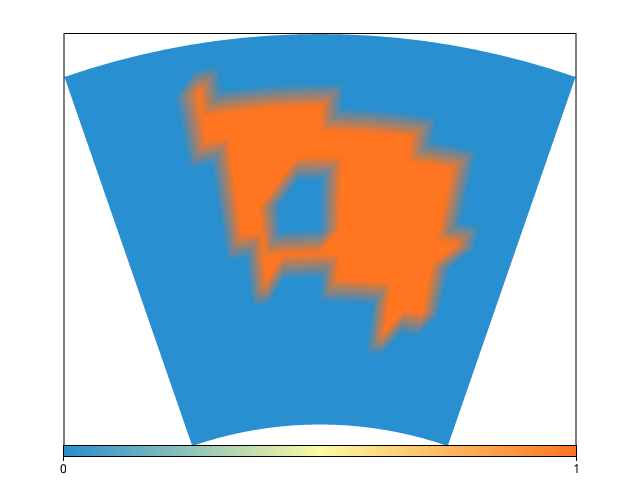

In [5]:
quickShow(anVar())

In [6]:
anInt = functions.Integrate('volume', anVar)

In [7]:
anInt.evaluate()

array([[ 0.23338962]])

In [ ]:
from timeit import timeit
print("!!! ITERATING !!!")
system.iterate()
print(round(timeit(anInt.update, number = 1), 2))
print(round(timeit(anInt.update, number = 1), 2))
print(round(timeit(anInt.update, number = 1), 2))
print("!!! ITERATING !!!")
system.iterate()
print(round(timeit(anInt.update, number = 1), 2))
print(round(timeit(anInt.update, number = 1), 2))
print(round(timeit(anInt.update, number = 1), 2))
print("!!! ITERATING !!!")
system.iterate()
print(round(timeit(anInt.update, number = 1), 2))
print(round(timeit(anInt.update, number = 1), 2))
print(round(timeit(anInt.update, number = 1), 2))

In [8]:
newFn = anInt ** 2.

In [10]:
newFn.evaluate()

array([[ 0.05447072]])